### useful stats 

#### number of ids/participants = 27
#### average time span = 78 days
#### average mood measurements 
#### mood meaurements per day
#### average time between mood measurements = 

#### average count target = 
#### share notebook

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [104]:
parse_dates = ['time']
df = pd.read_csv("dataset_mood_smartphone.csv") #,parse_dates=parse_dates)
df = df[['id','time','variable','value']]

In [106]:
# splitting time into date and hour
df[['date', 'hour']] = df['time'].str.split(' ', 1, expand=True)
df['date'] =  pd.to_datetime(df['date'], format='%Y-%m-%d')
df['hour'] =  pd.to_datetime(df['hour'], format='%H:%M:%S.%f').dt.hour

In [102]:
df.dtypes

id                   object
time                 object
variable             object
value               float64
date         datetime64[ns]
timestamp             int64
dtype: object

In [94]:
df.isna().sum()

id             0
time           0
variable       0
value        202
date           0
timestamp      0
dtype: int64

In [95]:
df = df[df['value'].notna()]

### distribution of target variable

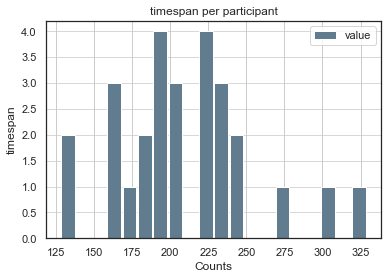

In [229]:
mood = df[df['variable']=='mood']
mood = mood[['id','value']].groupby(['id']).count()
mood.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('mood recordings per participant')
plt.xlabel('Counts')
plt.ylabel('timespan')
plt.grid(axis='y', alpha=0.75)

### creating data table with unstacked variables

#### some variables can be averaged, others should be summed. Therefore, two groupbys are required

In [121]:
agg = ['mood','circumplex.arousal','circumplex.valence','activity']

In [174]:
df_agg = df[df['variable'].isin(agg)]
df_sum = df[~df['variable'].isin(agg)]

In [175]:
df_sum =df_sum.groupby(['id','date','hour','variable']).sum().unstack().reset_index().sort_values(['id','date','hour']).fillna(0)
df_agg =df_agg.groupby(['id','date','hour','variable']).mean().unstack().reset_index().sort_values(['id','date','hour']).fillna(0)
data = df_sum.merge(df_agg,how='outer', on=["id", "date","hour"]).fillna(0)

/Users/benplatten/.pyenv/versions/3.7.2/envs/werkcollege/lib/python3.7/site-packages/pandas/core/generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [176]:
data.columns=data.columns.get_level_values(1)

In [177]:
cols = ['id', 'date', 'hour', 'appCat.builtin', 'appCat.communication',
       'appCat.entertainment', 'appCat.finance', 'appCat.game',
       'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel',
       'appCat.unknown', 'appCat.utilities', 'appCat.weather', 'call',
       'screen', 'sms', 'activity', 'circumplex.arousal', 'circumplex.valence',
       'mood']
data.columns=cols

In [180]:
# checking that variable values haven't changed because of the merge
df_agg = df[df['variable'].isin(agg)]
print(df_agg['value'][df_agg['variable'] == 'activity'].sum())
print(data['activity'].sum())

2662.9862874758546
2662.986287475854


In [186]:
average_rows = data[['id','hour']].groupby(['id']).count()
average_rows.hour.mean()

991.5555555555555

#### timespan

In [198]:
timespan = data[['id','date']].groupby('id').apply(lambda x: x.max() - x.min())       #{'date' : [np.min, np.max]})

In [201]:
timespan.mean()

date   78 days 18:40:00
dtype: timedelta64[ns]

In [207]:
timespan.date = timespan.date.dt.days

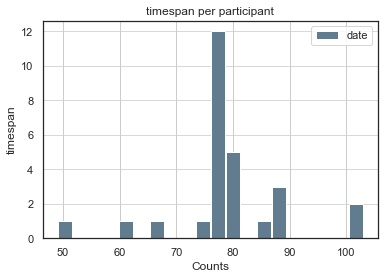

In [208]:
timespan.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('timespan per participant')
plt.xlabel('Counts')
plt.ylabel('timespan')
plt.grid(axis='y', alpha=0.75)

In [248]:
test=df[df['id']=='AS14.01']
print(test.date.max()-test.date.min())
print(test[])

77 days 00:00:00


In [256]:
mood_perday =  data[['id','date','mood']].groupby('id').agg({'date' : lambda x: x.max() - x.min(),
                                      'mood' : lambda x: (x != 0).sum()                   
                                      })

mood_perday['mood_per_day'] 
#mood_perday['mood_per_day'] = mood_perday['mood']/ mood_perday['date']

TypeError: Cannot divide float64 data by TimedeltaArray

### correlation plot

In [213]:
corr_df = data[['hour', 'appCat.builtin', 'appCat.communication',
       'appCat.entertainment', 'appCat.finance', 'appCat.game',
       'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel',
       'appCat.unknown', 'appCat.utilities', 'appCat.weather', 'call',
       'screen', 'sms', 'activity', 'circumplex.arousal', 'circumplex.valence',
       'mood']]

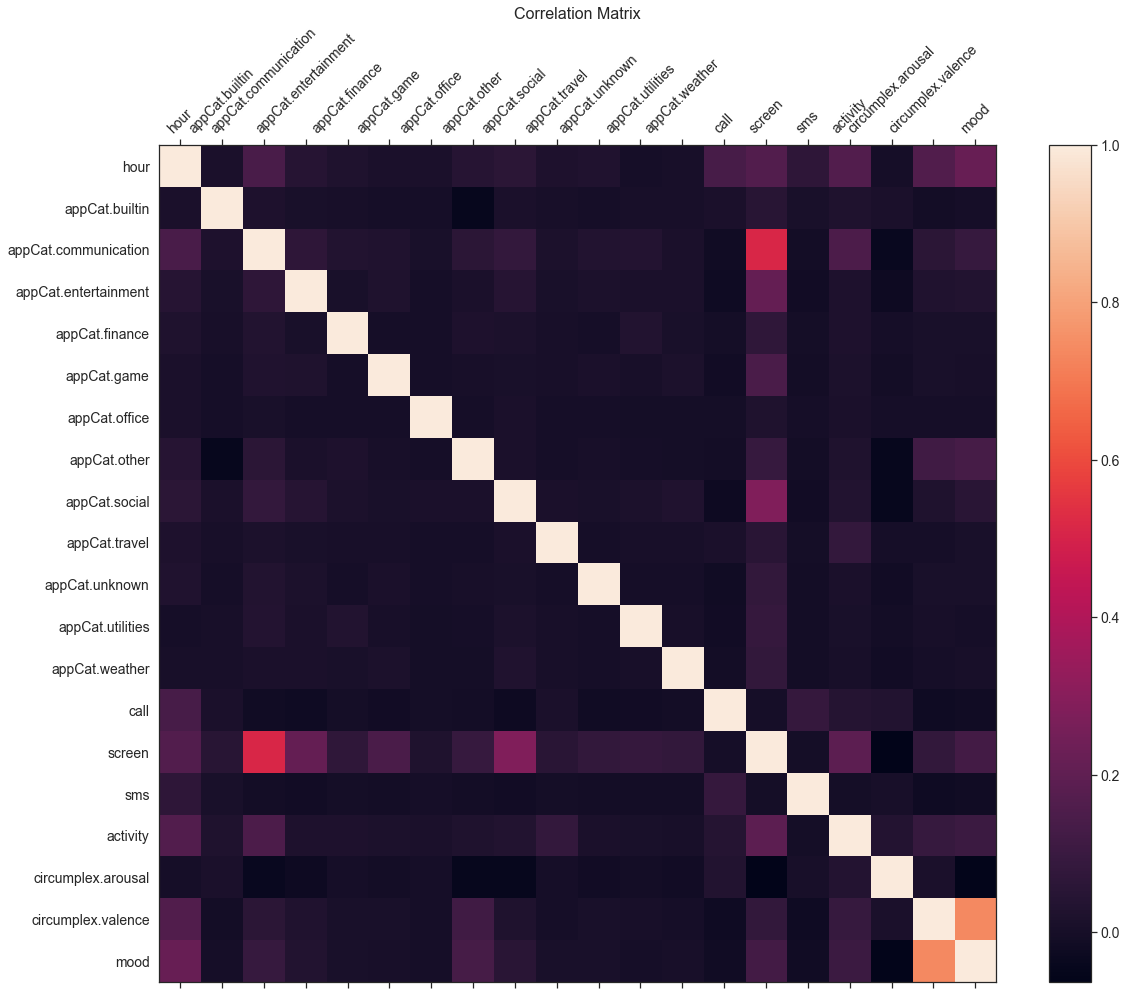

In [222]:
f = plt.figure(figsize=(19, 15))
plt.matshow(corr_df.corr(), fignum=f.number)
plt.xticks(range(corr_df.select_dtypes(['number']).shape[1]), corr_df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(corr_df.select_dtypes(['number']).shape[1]), corr_df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);